In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import datasets, model_selection, metrics
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
import scipy.stats as st


from functions import *

# 1. Data Exploration & Cleaning

## 1.1 Demographics Table

In [2]:
# Load data
df_demo = pd.read_csv('../data/raw/df_final_demo.txt')

# Rename columns and explore table
df_demo = rename_demo_columns(df_demo)
data_exploration(df_demo)

Number of rows: 70609
Number of columns: 9
Number of duplicates: 0

Numerical Columns: Index(['client_id', 'tenure_year', 'tenure_month', 'age', 'number_of_accounts',
       'balance', 'calls_6_month', 'logons_6_month'],
      dtype='object')

Categorical Columns: Index(['gender'], dtype='object')


,Column,Data Type,Non-Null Count,Missing Values,Unique Values
0,client_id,int64,70609,0,70609
1,tenure_year,float64,70595,14,54
2,tenure_month,float64,70595,14,482
3,age,float64,70594,15,165
4,gender,object,70595,14,4
5,number_of_accounts,float64,70595,14,8
6,balance,float64,70595,14,70328
7,calls_6_month,float64,70595,14,8
8,logons_6_month,float64,70595,14,9


**<ins>Observations:</ins>**
- For some client_ids we find a few missing values (14 to 15). Taking into account the large number of total rows (> 70k), we can fill the mising values with mean and mode for numerical and categorical columns, respectively, without changing the distribution.
- In the columns we identify seven numerical variables ('tenure_year', 'tenure_month', 'age', 'number_of_accounts', 'balance', 'calls_6_month', 'logons_6_month'), all with data type float. Some numerical variables should be integer instead ('number_of_accounts', 'calls_6_month', 'logons_6_month'). In addition, we find two categorical variables ('gender', 'client_id'), of which one ('client_id') is of type integer, but should better be string (object-type).

In [3]:
# Select categorical and numerical columns
cols_demo_numerical = ['tenure_year', 'tenure_month', 'age', 'number_of_accounts', 'balance', 'calls_6_month', 'logons_6_month']
cols_demo_categorical = ['gender', 'client_id']

# Fill missing values in numerical columns with the mean and in categorical columns with the mode
df_demo = fill_missing(df_demo, cols_demo_numerical, cols_demo_categorical)

# Change discrete numerical variables from type float to integer + client_id from integer to object
df_demo[['number_of_accounts', 'calls_6_month', 'logons_6_month']] = df_demo[['number_of_accounts', 'calls_6_month', 'logons_6_month']].astype(("int64"))
df_demo['client_id'] = df_demo['client_id'].astype(str)

# Save cleaned dataframe to csv-file
df_demo.to_csv("../data/cleaned/df_final_demo_cleaned.csv", index=False)

In [4]:
# (Nat)f_1.1.Perform initial data cheking:
initial_data_checking(df_demo)


Shape of the DataFrame:

(70609, 9)

Duplicate Rows Number:

0

Summary Statistics:

        tenure_year  tenure_month           age  number_of_accounts  \
count  70609.000000  70609.000000  70609.000000        70609.000000   
mean      12.052950    150.659367     46.442240            2.255477   
std        6.871137     82.081716     15.589616            0.534956   
min        2.000000     33.000000     13.500000            1.000000   
25%        6.000000     82.000000     32.500000            2.000000   
50%       11.000000    136.000000     47.000000            2.000000   
75%       16.000000    192.000000     59.000000            2.000000   
max       62.000000    749.000000     96.000000            8.000000   

            balance  calls_6_month  logons_6_month  
count  7.060900e+04   70609.000000    70609.000000  
mean   1.474452e+05       3.382402        5.566627  
std    3.014788e+05       2.236365        2.353066  
min    1.378942e+04       0.000000        1.000000  
25%    3.

In [5]:
# (Nat)f_1.2.Check Unique values, %, Missing values, %, data type:
unique_and_missing_values_dtype(df_demo)

,non-Null_count,dtype,unique_values,%_unique,missing_values,%_missing
client_id,70609,object,70609,100.0%,0,0.0%
tenure_year,70609,float64,55,0.08%,0,0.0%
tenure_month,70609,float64,483,0.68%,0,0.0%
age,70609,float64,166,0.24%,0,0.0%
gender,70609,object,4,0.01%,0,0.0%
number_of_accounts,70609,int64,8,0.01%,0,0.0%
balance,70609,float64,70329,99.6%,0,0.0%
calls_6_month,70609,int64,8,0.01%,0,0.0%
logons_6_month,70609,int64,9,0.01%,0,0.0%


In [6]:
# (Nat)f_1.3.separate categorical and numerical columns:
separate_columns(df_demo)


categorical_cols:

Index(['client_id', 'gender'], dtype='object')

numerical_cols:

Index(['tenure_year', 'tenure_month', 'age', 'number_of_accounts', 'balance',
       'calls_6_month', 'logons_6_month'],
      dtype='object')


In [7]:
# (Nat)f_1.4.Analyze_numerical cols
analyze_numerical(df_demo) 


Numerical Columns Analysis:


,tenure_year,tenure_month,age,number_of_accounts,balance,calls_6_month,logons_6_month
count,70609.000000,70609.000000,70609.000000,70609.000000,7.060900e+04,70609.000000,70609.000000
mean,12.052950,150.659367,46.442240,2.255477,1.474452e+05,3.382402,5.566627
std,6.871137,82.081716,15.589616,0.534956,3.014788e+05,2.236365,2.353066
min,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,6.000000,82.000000,32.500000,2.000000,3.735012e+04,1.000000,4.000000
50%,11.000000,136.000000,47.000000,2.000000,6.334555e+04,3.000000,5.000000
75%,16.000000,192.000000,59.000000,2.000000,1.376355e+05,6.000000,7.000000
max,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [8]:
# (Nat)f_1.6.script for filling missing data (numerical_data with 'mean',categorical_data with 'mode' :
fill_missing_values(df_demo)

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month
0,836976,6.0,73.0,60.5,U,2,45105.30,6,9
1,2304905,7.0,94.0,58.0,U,2,110860.30,6,9
2,1439522,5.0,64.0,32.0,U,2,52467.79,6,9
3,1562045,16.0,198.0,49.0,M,2,67454.65,3,6
4,5126305,12.0,145.0,33.0,F,2,103671.75,0,3
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3,1411062.68,5,5
70605,8981690,12.0,148.0,31.0,M,2,101867.07,6,6
70606,333913,16.0,198.0,61.5,F,2,40745.00,3,3
70607,1573142,21.0,255.0,68.0,M,3,475114.69,4,4


## 1.2 Web Data Table

In [9]:
# Load data
df_web_data_pt_1 = pd.read_csv('../data/raw/df_final_web_data_pt_1.txt')
df_web_data_pt_2 = pd.read_csv('../data/raw/df_final_web_data_pt_2.txt')

# Concatenate two parts
df_web_data = pd.concat([df_web_data_pt_1, df_web_data_pt_2], axis=0)

# Explore table
data_exploration(df_web_data)

Number of rows: 755405
Number of columns: 5
Number of duplicates: 10764

Numerical Columns: Index(['client_id'], dtype='object')

Categorical Columns: Index(['visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')


,Column,Data Type,Non-Null Count,Missing Values,Unique Values
0,client_id,int64,755405,0,120157
1,visitor_id,object,755405,0,130236
2,visit_id,object,755405,0,158095
3,process_step,object,755405,0,5
4,date_time,object,755405,0,629363


**<ins>Observations:</ins>**
- We find about 11k duplicates on a total of about 750k rows. We expect the duplicates to originate from technical errors in the data collection (e.g. a client clicks on a button and this action is recorded two times).
- As in the demographics table, also here the client_id is of type integer, but should be object.
- The date_time column is of type object. We convert it to datetime and split the column in two: date and time.

In [10]:
# Select categorical and numerical columns
cols_web_numerical = []
cols_web_categorical = ['client_id', 'visitor_id', 'visit_id', 'process_step', 'data_time']

In [11]:
# Change client_id column from type integer to object
df_web_data['client_id'] = df_web_data['client_id'].astype(str)

# Change date_time column from type object to datetime and split into date and time
df_web_data['date_time'] = pd.to_datetime(df_web_data['date_time'])
#df_web_data['date'] = df_web_data['date_time'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
#df_web_data['time'] = df_web_data['date_time'].apply(lambda x: pd.to_datetime(x, format='%H:%M:%S.%f'))
#df_web_data = df_web_data.drop(columns='date_time')

# Drop duplicates
df_web_data = df_web_data.drop_duplicates()

# Save cleaned dataframe to csv-file
df_web_data.to_csv("../data/cleaned/df_final_web_data_cleaned.csv", index=False)

## 1.3 Experiment Clients Table

In [12]:
# Load data
df_clients = pd.read_csv('../data/raw/df_final_experiment_clients.txt')

# Rename column and explore table
df_clients = df_clients.rename(columns={'Variation': 'variation'})
data_exploration(df_clients)

Number of rows: 70609
Number of columns: 2
Number of duplicates: 0

Numerical Columns: Index(['client_id'], dtype='object')

Categorical Columns: Index(['variation'], dtype='object')


,Column,Data Type,Non-Null Count,Missing Values,Unique Values
0,client_id,int64,70609,0,70609
1,variation,object,50500,20109,2


**<ins>Observations:</ins>**
- We find about 20k missing values in a total of about 120k total values. As the information about a client being in the test or the control group is critical for the analysis, we decide to drop the rows with missing values.
- Again, the client_id column should be of type object instead of integer.

In [13]:
# Select categorical and numerical columns
cols_clients_numerical = []
cols_clients_categorical = ['client_id', 'variation']

In [14]:
# Change client_id column from type integer to object
df_clients['client_id'] = df_clients['client_id'].astype(str)

# Drop all missing values
df_clients = df_clients.dropna(subset=["variation"])

# Save cleaned dataframe to csv-file
df_clients.to_csv("../data/cleaned/df_final_experiment_clients_cleaned.csv", index=False)

### Cleaning Summary:
1. df_final_demo.txt = 15 missing value. Solution: filling missing data numerical_data with 'mean',categorical_data with 'mode'
2. df_final_experiment_clients.txt  = 20109 missing values. Solution : drop()
3. df_final_web_data_pt_1.txt  = Duplicate Rows Number: 2095
4. df_final_web_data_pt_2.txt  = Duplicate Rows Number: 8669 

# 2. Exploratory Data Analysis

## 2.1 Univariate EDA

### 2.1.1 Demographics Table

In [15]:
# Discretizing 'age' into 4 categories
bins = [12, 19, 39, 59, 100]
labels = ['Teenagers', 'Young Adults', 'Adults', 'Seniors']
df_demo['age_group'] = pd.cut(df_demo['age'], bins=bins, labels=labels, include_lowest=True).astype('object')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

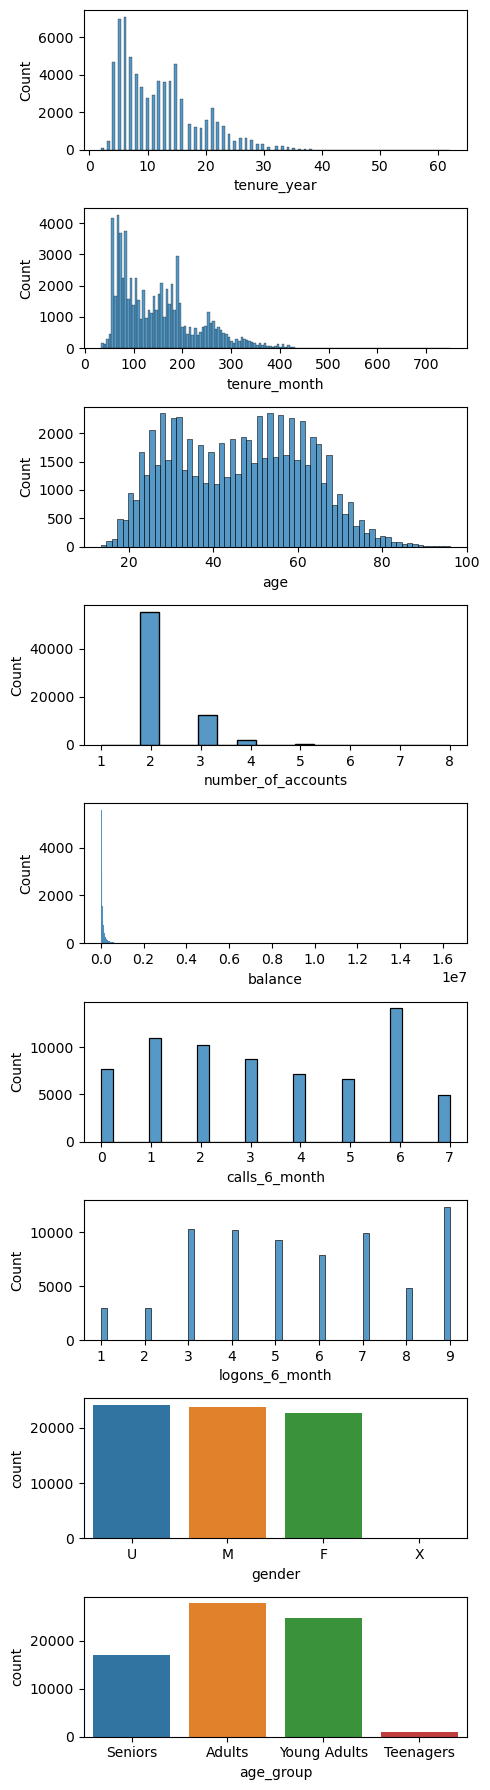

In [16]:
# Investigate distributions
plot_distributions_numerical(df_demo, cols_demo_numerical + ['gender', 'age_group'])

### Are the primary clients younger or older?

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


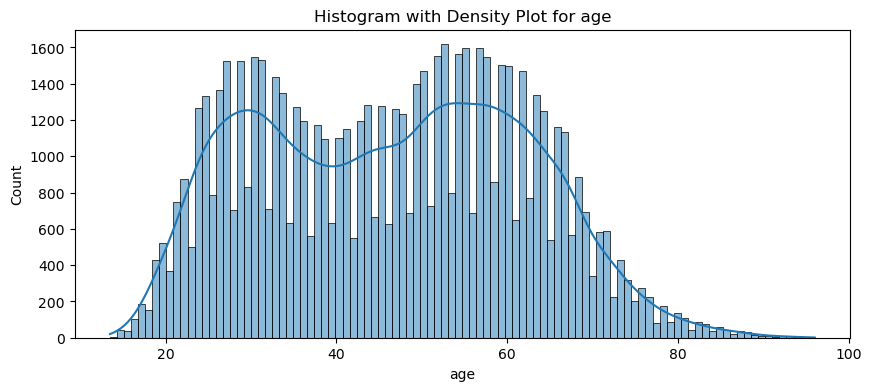

In [17]:
# (Nat)f_1.8.Histogram for visual inspection of distribution and outliers
histogram_with_density_plot(df_demo, 'age')

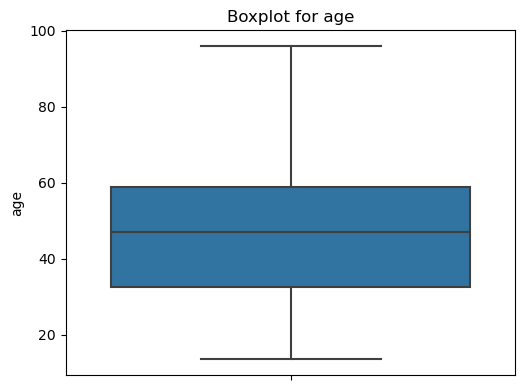

In [18]:
# (Nat)f_1.9.Boxplot to visually check for outliers
plot_boxplot(df_demo, 'age')

In [19]:
# (Nat)f_2.0.Shapiro-Wilk test for normality
shapiro_wilk_test(df_demo, 'age')

Shapiro-Wilk Test for age: Statistics=0.975, p=0.000
The data does not appear to be normally distributed (reject H0).


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Are the primary clients  new or long-standing?

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


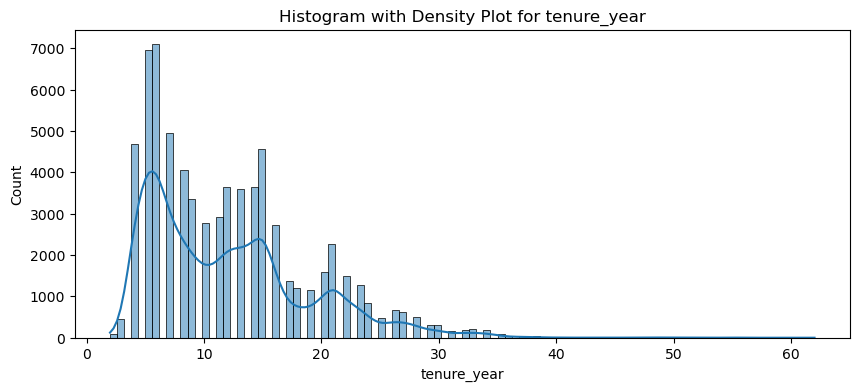

In [20]:
# (Nat)f_1.8.Histogram for visual inspection of distribution and outliers
histogram_with_density_plot(df_demo, 'tenure_year')

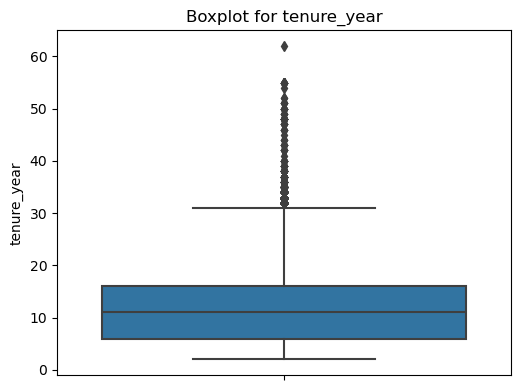

In [21]:
# (Nat)f_1.9.Boxplot to visually check for outliers
plot_boxplot(df_demo, 'tenure_year')

In [22]:
# (Nat)f_2.0.Shapiro-Wilk test for normality
shapiro_wilk_test(df_demo, 'tenure_year')

Shapiro-Wilk Test for tenure_year: Statistics=0.912, p=0.000
The data does not appear to be normally distributed (reject H0).


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**<ins>Observations</ins>**
- **Tenure year (and month)**: the distribution suggests that there are years in which subsequently more people become clients and then there are years in which the acquisition of clients declines again.
- **Age**: the distribution shows two distinct peaks, which could be related to the trends in client acqusition seen above. In general there is a wide range of age and no trend is to be observed.
- **Number of accounts**: most people have two accounts, some have three and only very few have four or more.
- **Balance**: Most clients have a relatively low balance compared to much fewer clients with higher balances.
- **Calls**: The big majority of clients called at least once in the last six months. For a number of six calls, we find a very distinct spike, which could be due to monthly jours fixes. There are no clients with a number of calls larger than seven, which is - taking into account the large sample size - unexpected.
- **Logons**: The big majority of clients logged on at least three times in the last six months, and above that value, the number of logons is quite equally distributed. For a number of eight logons, however, the count is very low compared to seven and nine. In addition, there is no logon number higher than nine, which requires an explanation, as naturally the distribution would be expected to fade out for higher numbers.
- **Gender**: For around a third of the clients, there is no information about their gender available. For the remaining two thirds, the number of females is a bit higher than the number of males.

### 2.1.2 Web Data Table

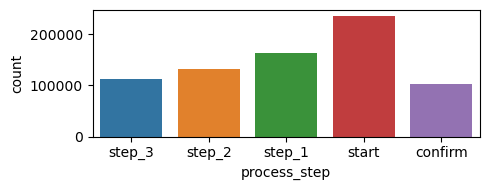

In [23]:
# Investigate distributions
plot_distributions_numerical(df_web_data, ['process_step'])

**<ins>Observations</ins>**
- There are about two times as much start actions as confirm actions.

### 2.1.3 Experiment Clients Table

In [24]:
# Investigate distributions
df_clients['variation'].value_counts()

variation
Test       26968
Control    23532
Name: count, dtype: int64

**<ins>Observations</ins>**
- There are about 15% more clients in the test than in the control group.

## 2.2 Bivariate EDA

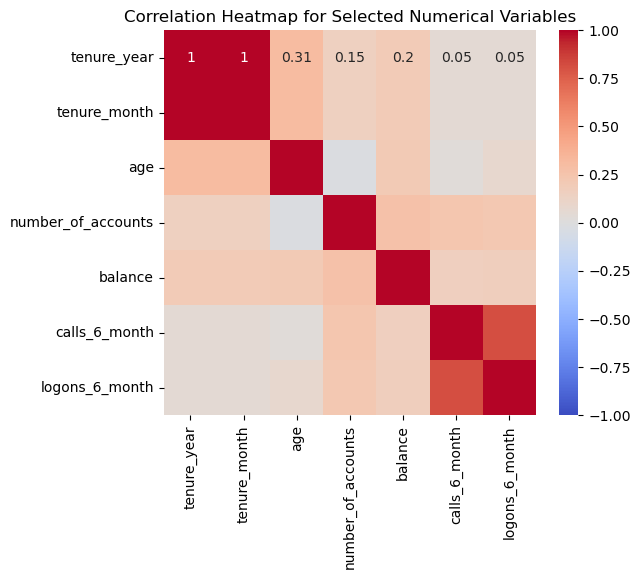

In [25]:
create_correlation_matrix(df_demo, cols_demo_numerical)

**<ins>Observations</ins>**
- Age and tenure year/month are correlated: the older the clients, the longer they have been clients.
- Balance is correlated with all other variables: the higher the balance, the longer the clients are already clients, the older they are, the more accounts they have, the higher the number of calls and logons in the six months.
- Number of logons and calls are very strongly correlated.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


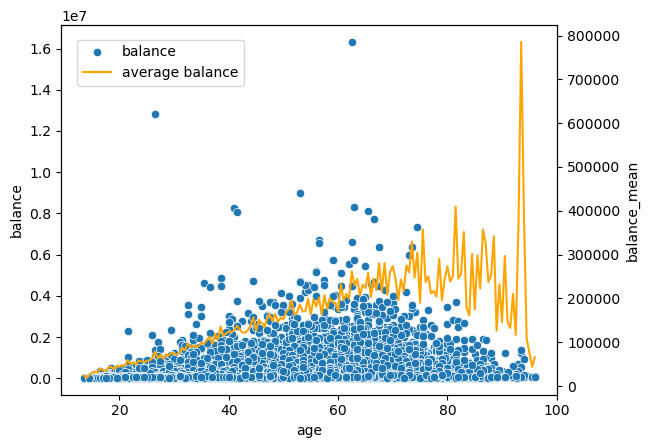

In [26]:
# Investigate association of age and balance
plot_balance_vs_age(df_demo)

# 3. Experiment Evaluation

In [27]:
# merge tables and only consider clients present in all three tables
df_ = pd.merge(df_web_data, df_clients, on='client_id', how='inner')
df = pd.merge(df_, df_demo, on='client_id', how='inner')

# Add extra column indicating the day counting from the start of the trial
df["day_of_trial"] = df["date_time"].dt.dayofyear - df["date_time"].sort_values().dt.dayofyear.iloc[0]

# Add extra column to identify really unique sessions
df['unique_session_id'] = df['client_id'] + '_' + df['visit_id']

In [28]:
#g = sns.FacetGrid(df, row="variation", hue="variation", height=2, aspect=3)
#g.map(sns.histplot, "calls_6_month")

## 3.1 Design Effectiveness

Bias Test vs Control: 


<Axes: xlabel='bias', ylabel='variable'>

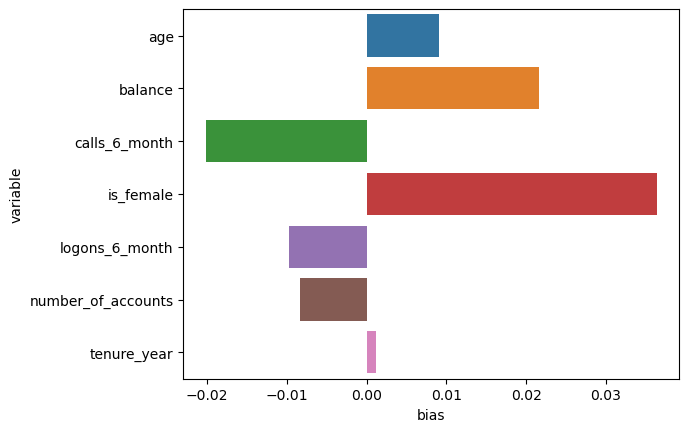

In [29]:
# check for bias in the test and control group for the different variables
biases = experiment_evalutaion(df)
sns.barplot(biases, y="variable", x="bias")

**<ins>Observations:</ins>**
* Maximum bias is 4%, which appears in the gender category.
* In general, the bias is acceptable for the experiment.

## 3.2 Duration Assessment

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='day_of_trial'>

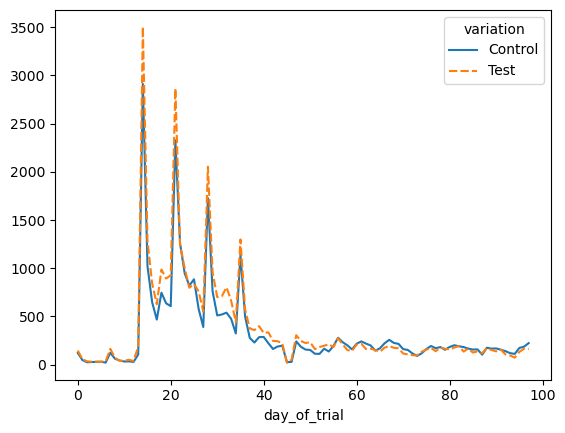

In [30]:
# check number of visits per day for both groups
visits_daily = df.pivot_table(index="day_of_trial", values="visit_id", columns="variation", aggfunc="nunique")
sns.lineplot(visits_daily)

In [31]:
calculate_avg_daily_visits_per_time_period(visits_daily)

Average Daily Visits
--------------------
In the last two weeks of March: 120
In April: 1755
In May and June: 333


**<ins>Observations:</ins>**
* During the first two weeks, the access rate to the page is relatively low.
* On Wednesdays, the visit rate tends to be higher than on other days.
* The access rate increases significantly after the first two weeks and in April shows very distinct spikes on the Wednesdays. The high acticity rate in April is probably due to the deadline for filing federal income tax returns in the U.S.
* In March and June, the rate is much lower again, but remains on a relatively steady number that is higher than for the first two weeks.


# 4. Hypotheses

## 4.1. The new feature would encourage more clients to complete the process


### **KPI**: completion rate 

The completion rate indicates the number of visits which reach 'confirm' step. Thi analysis takes into account the completion rate per day, which in the end will be concluded by completion rate over the test period. 
<br>

Vanguard has set the minimum increase in completion rate at 5%. In other words, if the new design doesn't lead to at least this level of improvement, it may not be justifiable from a cost perspective.

In [32]:
# merged three dataframes on 'client_id'

df_main = main_df_hypothesis_1(df_demo, df_clients, df_web_data, 'client_id')

In [33]:
# create dataframe for control and test group separately which will be needed later for hypothesis testing
df_control = df_control_general(df_main)
df_test = df_test_general(df_main)

# add 'confirm_ratio' for both dataframes
df_control['confirm_ratio'] = round(df_control['confirm']/(df_control['confirm'] + df_control['no_confirm']),2)
df_test['confirm_ratio'] = round(df_test['confirm']/(df_test['confirm'] + df_test['no_confirm']),2)

Based on the error rate study, it's decided that this analysis will only focus on the first 55 days of the experiment.

In [34]:
# create dataframes for completion rate over 55 days of test period

start_date = df_control['date'].min()
day_55 = start_date + pd.Timedelta(days=53)

df_control_before_55 = df_control[(df_control['date'] >= start_date) & (df_control['date'] < day_55)].reset_index()
df_test_before_55 = df_test[(df_test['date'] >= start_date) & (df_test['date'] < day_55)].reset_index()


In [35]:
yc_before_55 = round(df_control_before_55['confirm'].sum()/(df_control_before_55['confirm'].sum() + df_control_before_55['no_confirm'].sum())*100,1)
yt_before_55 = round(df_test_before_55['confirm'].sum()/(df_test_before_55['confirm'].sum() + df_test_before_55['no_confirm'].sum())*100,1)

print('completion rate of Control group before 55 days:', yc_before_55,'%')
print('completion rate of Test group before 55 days:', yt_before_55,'%')

completion rate of Control group before 55 days: 48.5 %
completion rate of Test group before 55 days: 59.2 %


In [36]:
# visualization

# Create the bar plot
fig = go.Figure(data=[
    go.Bar(
        name='Control',
        x= ['Control'],
        y= [yc_before_55],
        text=[f'{yc_before_55} %'], 
        textposition='outside'
    
    ),
    go.Bar(
        name='Test',
        x= ['Test'],
        y= [yt_before_55],
        text=[f'{yt_before_55}%'], 
        textposition='outside')
])

# Change the bar mode
fig.update_layout(
    barmode='group',
    title='Completion Rate over test period between Control and Test Groups',
    xaxis_title='Group',
    yaxis_title='Completion Rate per test period',
    yaxis=dict(range=[0, 100]),
    legend_title='Metrics',
    font=dict(size=12)
)

fig.show()

**<ins>Observations:</ins>**
* The total completion rate in new feature during the test period is approximately 10% higher than the old feature. It proves that the hypothesis is correct.
* This completion rate has exceed the minimum increase in completion rate defined by the company.

## 4.2. The new feature would reduce the time spent on each step of the process, leading to more efficient completion


### **KPI**: Time Spent on each Step

1. Create a col 'completed_yes_no' per each visit_id
2. Calculate 'time_per_visit'
3. Check the distribution of 'time_per_visit' with histogra
4.  4.1. Remove outliers from data time_per_visit with Standard Deviation Method.
5.  4.2. Remove outliers from original data time_per_visit with Interquartile Range (IQR) Method
6. Hypothesis: Check if 'time_per_visit' is correlated with 'completed_yes_no'. H0: no correlation between the two variables. H1:As the time per visit increases, the likelihood of the task being completed decreases

In [50]:
# (Nat)f_3.1.Calculate time spent per visit and determine if the visit was completed
time_per_visit_completion = calculate_time_and_completion(df_cleaned_no_duplicated_confirms_step)
time_per_visit_completion.head()

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,variation,visitor_id,visit_id,process_step,date_time,date,completed_yes_no,time_per_visit_in_sec
0,3561384,4.0,56.0,59.5,U,2,63130.44,6,9,Test,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,2017-04-26,1,0
1,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,2017-04-09,0,242
12,2478628,16.0,198.0,47.0,F,2,32456.28,2,5,Test,754122351_18568832435,100022086_87870757897_149620,start,2017-05-23 20:44:01,2017-05-23,0,180
17,105007,9.0,118.0,35.0,F,2,34897.47,3,6,Control,676020267_36602664238,100030127_47967100085_936361,start,2017-03-22 11:07:49,2017-03-22,0,0
18,5623007,16.0,202.0,78.0,M,2,146827.14,5,8,Control,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:41:51,2017-04-14,0,132


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



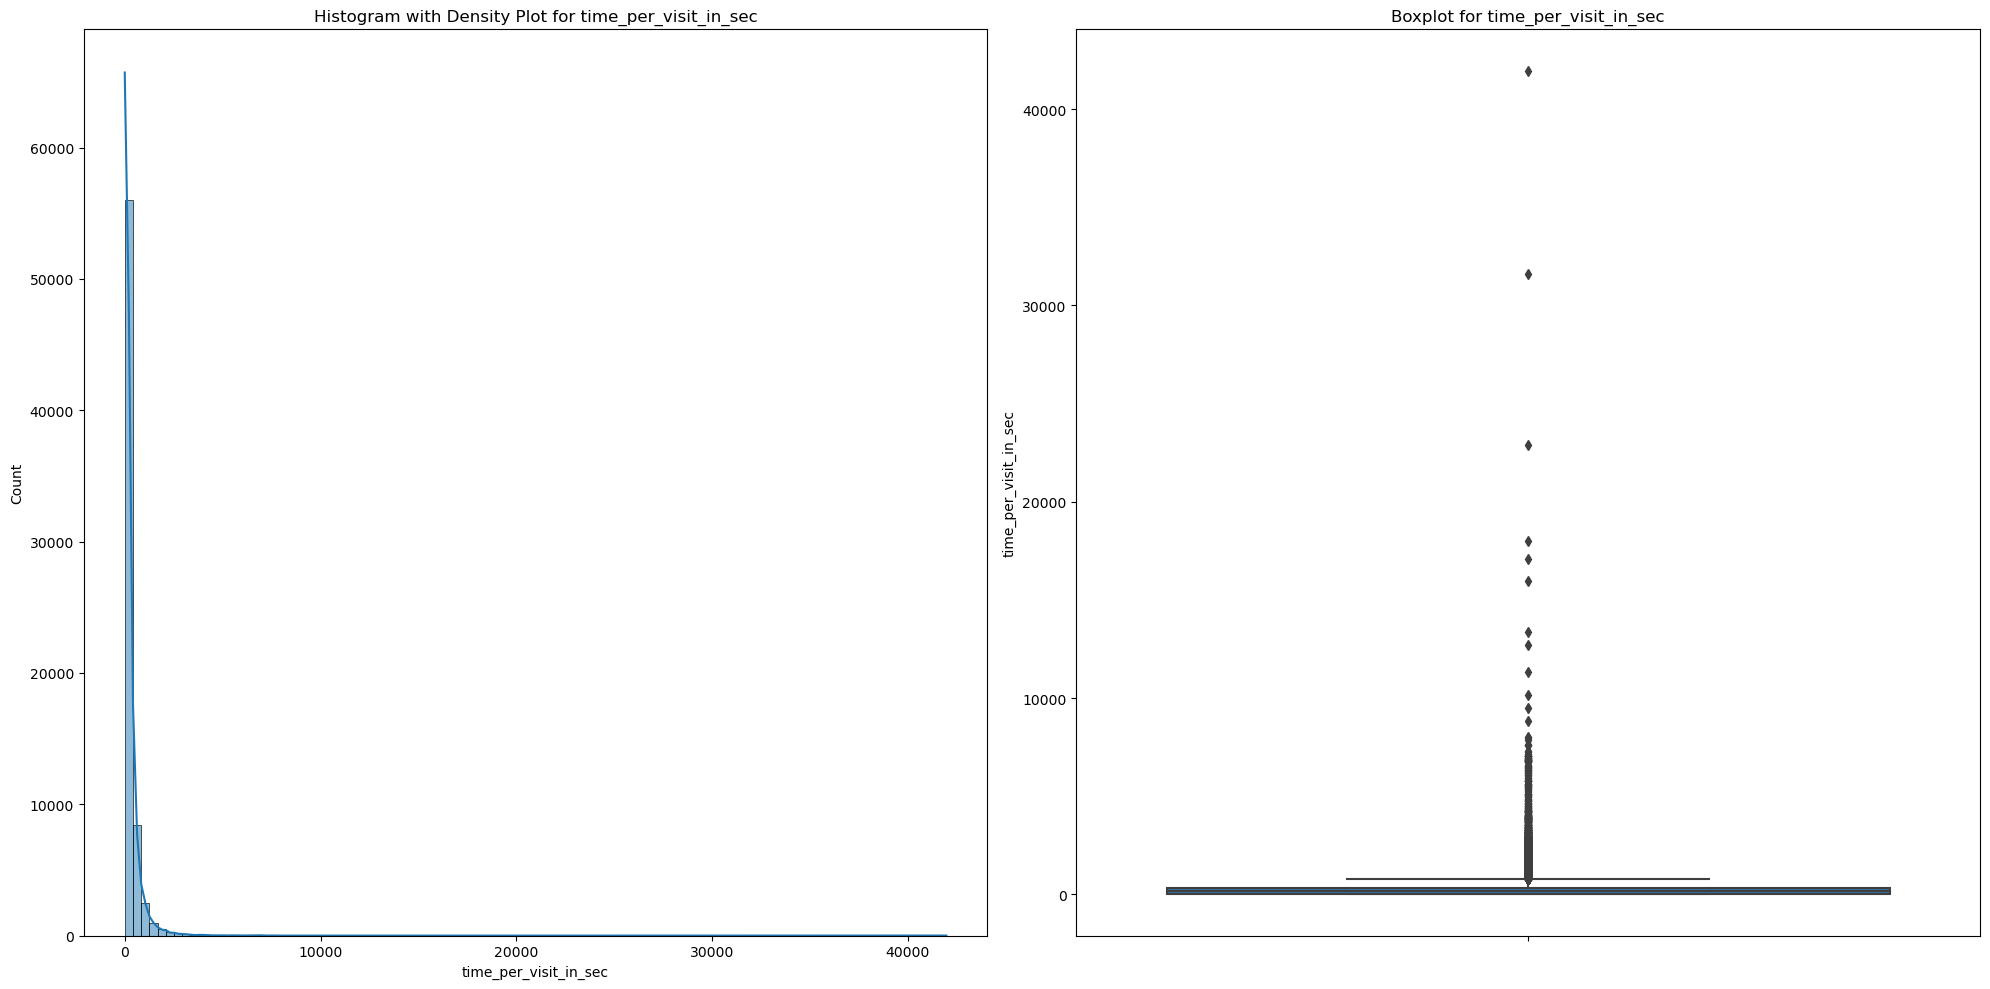

In [51]:
# (Nat)f_3.2.Check if the time spent for each visit is normally distributed with Histogram and Boxplot to visually check for outliers
histogram_distribution_boxplot_outliers(time_per_visit_completion, 'time_per_visit_in_sec')

In [52]:
# 3.3.Shapiro-Wilk test to check if data time_per_visit is normally distributed
shapiro_wilk_test(time_per_visit_completion, 'time_per_visit_in_sec')

Shapiro-Wilk Test for time_per_visit_in_sec: Statistics=0.443, p=0.000
The data does not appear to be normally distributed (reject H0).


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



In [53]:
# 2.7.Remove outliers from data time_per_visit with Standard Deviation Method.
time_per_visit_completion_std= remove_outliers_std(time_per_visit_completion, 'time_per_visit_in_sec')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



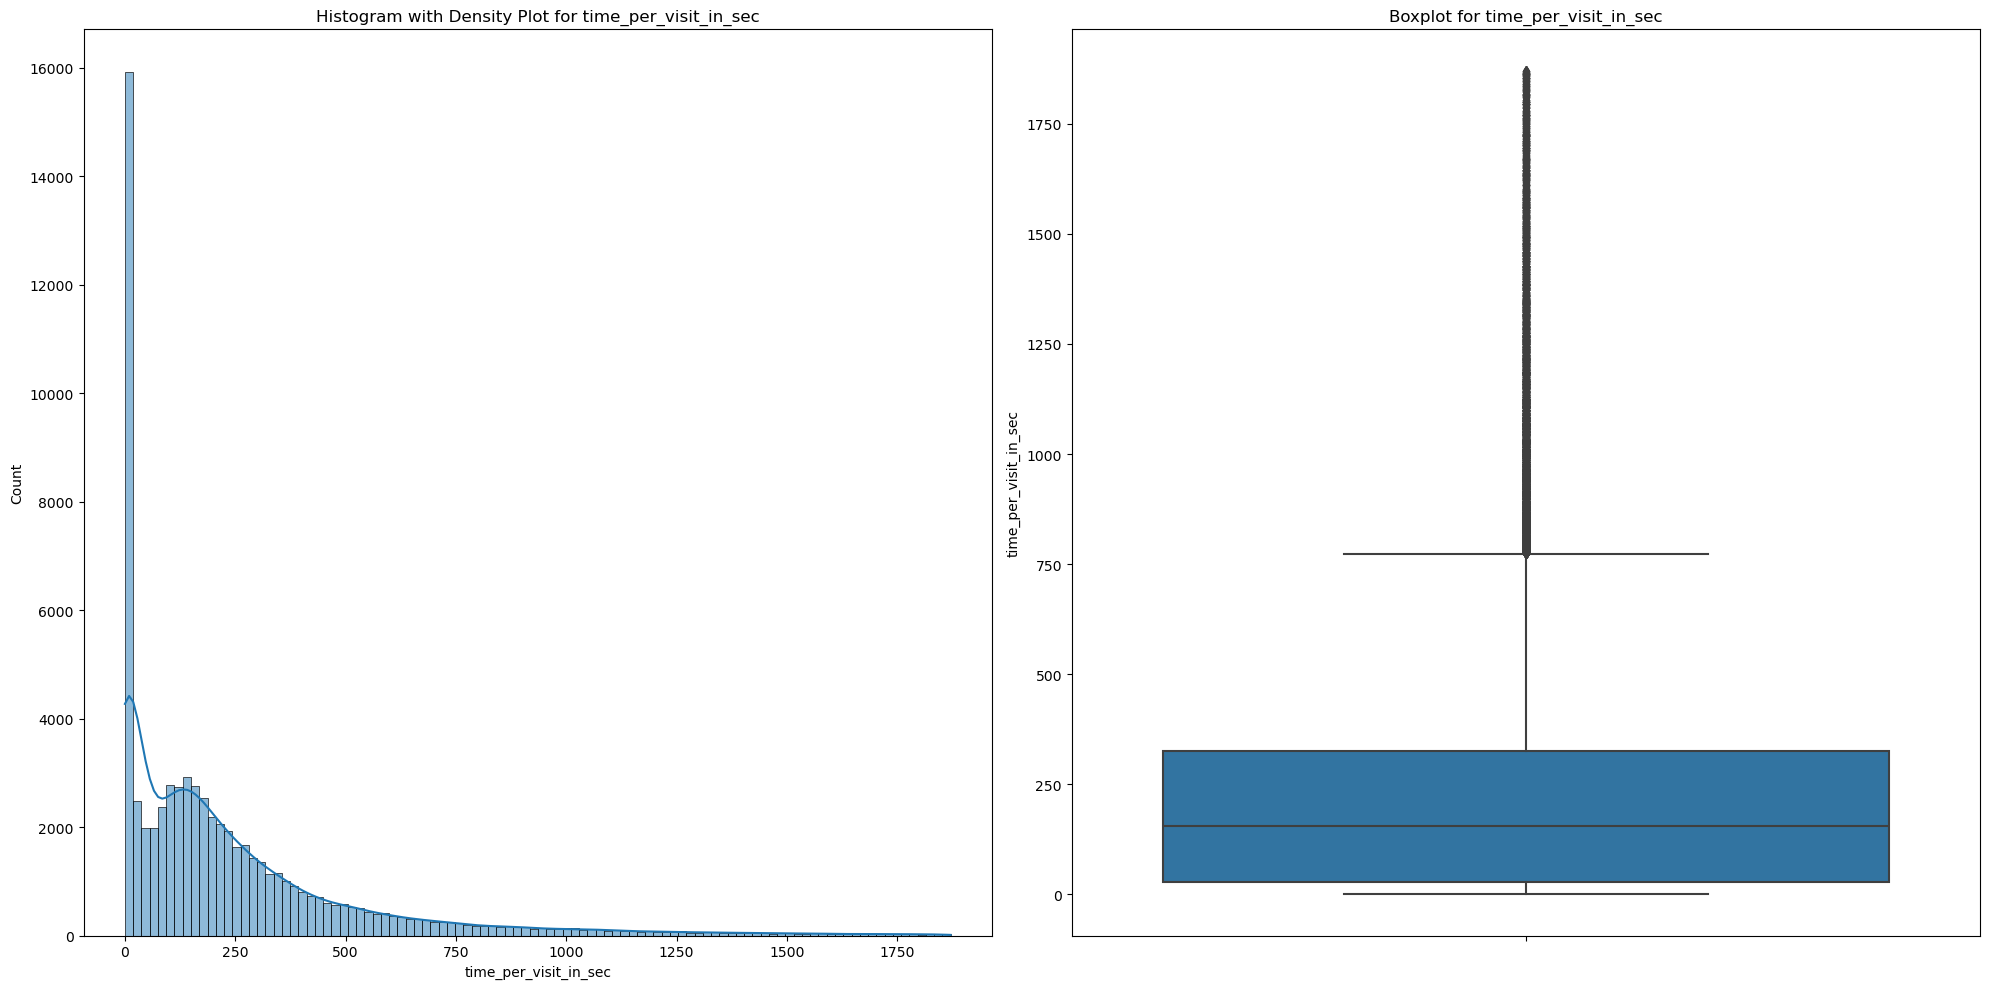

In [54]:
# check without outliers:
histogram_distribution_boxplot_outliers(time_per_visit_completion_std, 'time_per_visit_in_sec')

In [55]:
# 2.8.Remove outliers from original data time_per_visit with Interquartile Range (IQR) Method
time_per_visit_completion_iqr = remove_outliers_iqr(time_per_visit_completion, 'time_per_visit_in_sec')
time_per_visit_completion_iqr

,client_id,tenure_year,tenure_month,age,gender,number_of_accounts,balance,calls_6_month,logons_6_month,variation,visitor_id,visit_id,process_step,date_time,date,completed_yes_no,time_per_visit_in_sec
0,3561384,4.0,56.0,59.5,U,2,63130.44,6,9,Test,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,2017-04-26,1,0
1,7338123,7.0,88.0,23.5,M,2,26436.73,6,9,Test,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,2017-04-09,0,242
12,2478628,16.0,198.0,47.0,F,2,32456.28,2,5,Test,754122351_18568832435,100022086_87870757897_149620,start,2017-05-23 20:44:01,2017-05-23,0,180
17,105007,9.0,118.0,35.0,F,2,34897.47,3,6,Control,676020267_36602664238,100030127_47967100085_936361,start,2017-03-22 11:07:49,2017-03-22,0,0
18,5623007,16.0,202.0,78.0,M,2,146827.14,5,8,Control,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:41:51,2017-04-14,0,132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311940,8971313,7.0,95.0,25.5,U,2,46555.07,6,9,Test,520929316_99288864740,999958344_67534252886_39917,start,2017-04-15 00:34:32,2017-04-15,0,82
311952,2979920,11.0,138.0,28.5,F,2,83799.17,1,4,Test,830229399_73416253406,999971096_28827267783_236076,start,2017-04-13 10:31:49,2017-04-13,0,139
311958,4449968,21.0,252.0,53.5,F,4,124701.46,2,5,Test,842902495_57580498240,999976049_95772503197_182554,start,2017-04-04 12:50:10,2017-04-04,0,728
311964,829911,6.0,82.0,84.5,M,3,229828.31,6,9,Test,648229874_89449279372,999984454_18731538378_781808,start,2017-03-29 11:18:33,2017-03-29,0,154


In [56]:
# export df_time_per_visit_no_outliers_std df to csv:
time_per_visit_completion_iqr.to_csv('../data/cleaned/df_time_per_visit_no_outliers_iqr.csv', index=False)

In [57]:
# f_3.6.calculate the average time spent per segment for a given variation (after cleaning outliers)
df_gender, df_age, df_tenure = average_time_spent_per_variation_and_segment(time_per_visit_completion_iqr, 'variation')

In [58]:
df_gender

,gender,Average Time (seconds),Variation
0,F,186.328902,Test
1,M,190.449111,Test
2,U,187.280014,Test
3,X,177.000000,Test
4,F,182.634450,Control
5,M,186.087423,Control
6,U,186.489041,Control


In [59]:
df_age

,age,Average Time (seconds),Variation
0,17.0,165.500000,Test
1,17.5,172.538462,Test
2,18.0,123.394737,Test
3,18.5,177.901235,Test
4,19.0,139.918033,Test
...,...,...,...
309,92.5,1.000000,Control
310,93.0,45.000000,Control
311,93.5,214.600000,Control
312,94.0,164.500000,Control


In [60]:
df_tenure

,tenure_month,Average Time (seconds),Variation
0,33.0,150.153846,Test
1,34.0,183.250000,Test
2,35.0,128.100000,Test
3,36.0,234.272727,Test
4,37.0,66.761905,Test
...,...,...,...
880,602.0,628.000000,Control
881,624.0,135.333333,Control
882,655.0,119.500000,Control
883,668.0,87.000000,Control


### Average time per step in each variation

In [112]:
def calculate_time_spent(df):
    # Sort values and drop duplicates
    df_sorted = df.sort_values(by=['visit_id', 'process_step', 'date_time'], ascending=[True, True, False])
    df_main = df_sorted.drop_duplicates(subset=['visit_id', 'process_step'], keep='first').reset_index(drop=True)
    
    # Split the data into Control and Test groups
    df_control = df_main[df_main['variation'] == 'Control'].reset_index(drop=True)
    df_test = df_main[df_main['variation'] == 'Test'].reset_index(drop=True)
    
    def calculate_step_times(df):
        # Create a dictionary to hold dataframes for each step
        steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
        step_dfs = {step: df[df['process_step'] == step][['visit_id', 'date_time']].rename(columns={'date_time': f'date_time_{step}'}) for step in steps}
        
        # Merge step dataframes on 'visit_id'
        df_merged = step_dfs['start']
        for step in steps[1:]:
            df_merged = pd.merge(df_merged, step_dfs[step], on='visit_id', how='inner')
        
        # Calculate time spent for each step
        time_spent = {
            'step 1': (df_merged['date_time_step_1'] - df_merged['date_time_start']).mean().total_seconds(),
            'step 2': (df_merged['date_time_step_2'] - df_merged['date_time_step_1']).mean().total_seconds(),
            'step 3': (df_merged['date_time_step_3'] - df_merged['date_time_step_2']).mean().total_seconds(),
            'confirm': (df_merged['date_time_confirm'] - df_merged['date_time_step_3']).mean().total_seconds()
        }
        
        return time_spent
    
    # Calculate time spent for Control and Test groups
    time_spent_control = calculate_step_times(df_control)
    time_spent_test = calculate_step_times(df_test)
    
    # Create a summary dataframe
    time_spent_summary = pd.DataFrame({
        'step': ['step 1', 'step 2', 'step 3', 'confirm'],
        'Control (s)': [time_spent_control['step 1'], time_spent_control['step 2'], time_spent_control['step 3'], time_spent_control['confirm']],
        'Test (s)': [time_spent_test['step 1'], time_spent_test['step 2'], time_spent_test['step 3'], time_spent_test['confirm']]
    })
    
    return time_spent_summary

time_spent_summary = calculate_time_spent(df3)
time_spent_summary

,step,Control (s),Test (s)
0,step 1,43.737680,40.171597
1,step 2,34.693011,37.650056
2,step 3,95.367382,93.818560
3,confirm,135.883616,143.684701


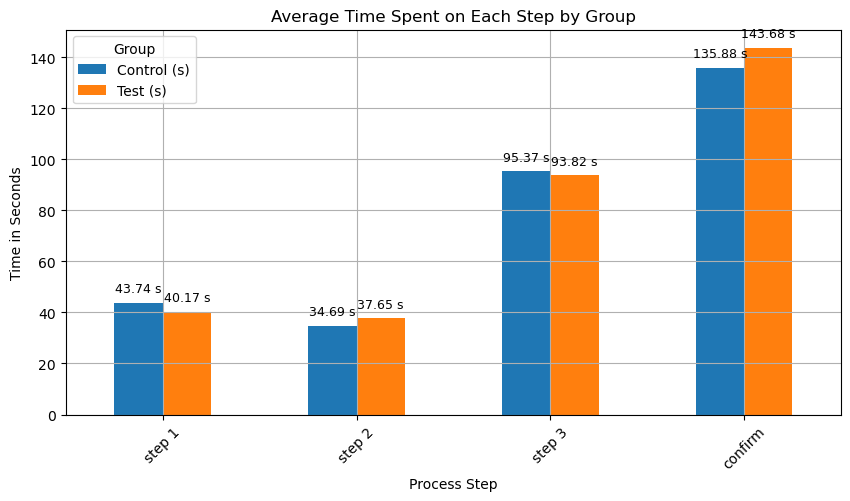

In [113]:
def plot_step_durations(df):
    ax = df.plot(x='step', kind='bar', figsize=(10, 5))
    plt.title('Average Time Spent on Each Step by Group')
    plt.xlabel('Process Step')
    plt.ylabel('Time in Seconds')
    plt.xticks(rotation=45)
    plt.legend(title='Group')
    plt.grid(True)
    
    # Adding percentage labels on each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f} s", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', rotation=0, xytext=(0, 10),
                    textcoords='offset points')

    plt.show()
    
    
plot_step_durations(time_spent_summary)

## 4.3. The new feature would reduce the error rates during the process, leading to smoother completion


### **KPI**: Error rates

Every time a user goes a step back, this is counted as an error. The error rate is the number of errors per session. Here the average error rate per day is considered.

In [61]:
# calculate average errors per day for test and control group
errors_daily = calculate_grouped_error_rates(df, grouping_column="day_of_trial")
errors_daily_to_csv(errors_daily)

# plot average errors per day
plot_avg_errors_per_day(errors_daily)

TypeError: calculate_grouped_error_rates.<locals>.<lambda>() got an unexpected keyword argument 'include_groups'

In [ ]:
# calculate the average daily error rates for different time periods of the experiment
calculate_avg_error_rates_per_time_period(df)

Daily Average Error Rates
-------------------------

In total
Control: 29.7%
Test: 43.6%

Trial Day < 55
Control: 25.9%
Test: 43.8%

Trial Day >= 55
Control: 42.1%
Test: 42.9%


**<ins>Observations:</ins>**
* The total average error rate for the test group is higher than for the control group (43.6% vs 29.7%).
* In the first 55 days of the experiment, the difference is even higher (43.8% vs 25.9%).
* After the first 55 days, the difference decreases to a very slight difference (42.9% vs 42.1%).
* The distributions of the average error rates per day for the test and the control group can be interpreted as the combination of two normal-like distributions (especially the one for the control group), originating from the first 55 days of the experiment and the remaiming days.

## 4.4 Percentage of dropped users on each step.
Percentage of users that we loose on each step in both groups ? What could be recommendations on improvements?

In [1]:
# 3.7. count_visit_ids_per_process_step. % of dropped users on each step.
count_visit_ids_per_process_step = count_visit_ids_per_process_step(df_cleaned_no_duplicated_confirms_step)
count_visit_ids_per_process_step

NameError: name 'count_visit_ids_per_process_step' is not defined

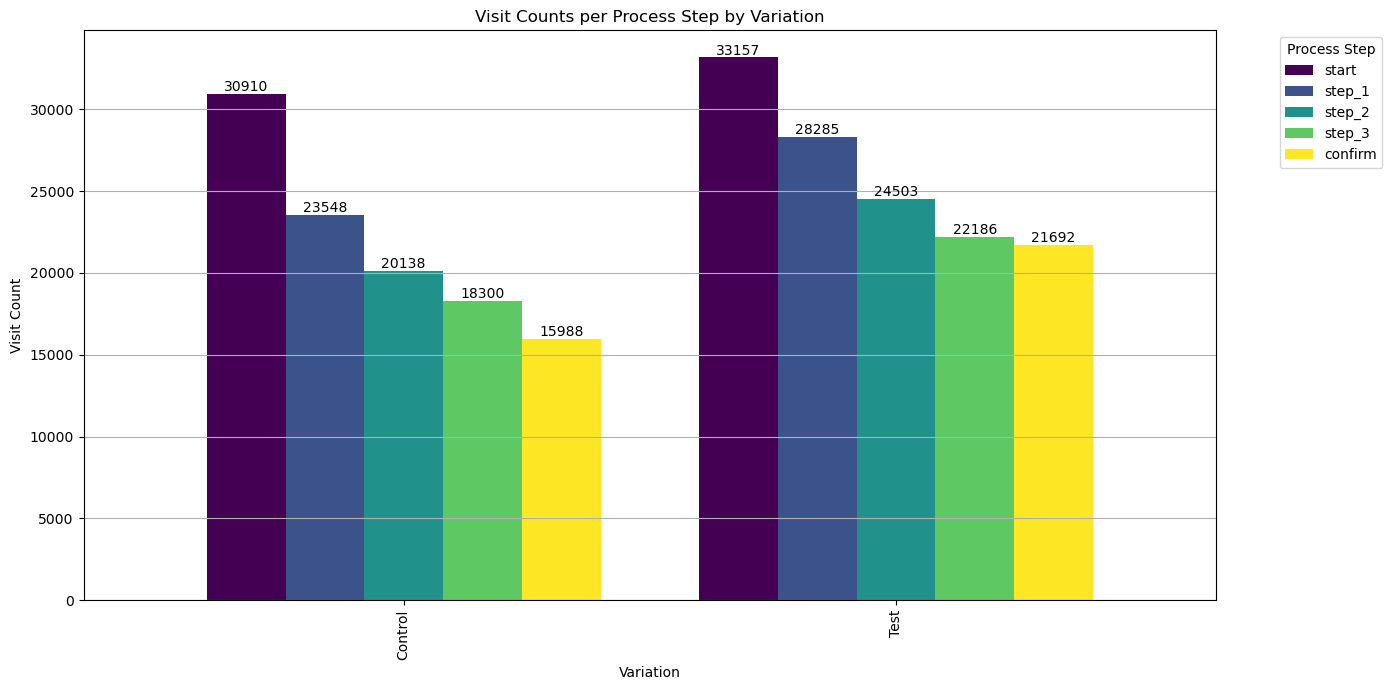

In [ ]:
def visualize_grouped_bar_chart_with_labels(df):
    # Filter out the 'total_drop' rows for plotting
    plot_df = df[df['process_step'] != 'total_drop']
    
    # Pivot the data for easier plotting, ensuring 'confirm' is the last column
    pivot_df = plot_df.pivot(index='variation', columns='process_step', values='visit_count')
    pivot_df = pivot_df[['start', 'step_1', 'step_2', 'step_3', 'confirm']]
    
    # Plot the grouped bar chart
    ax = pivot_df.plot(kind='bar', figsize=(14, 7), colormap='viridis', width=0.8)
    
    # Add titles and labels
    plt.title('Visit Counts per Process Step by Variation')
    plt.xlabel('Variation')
    plt.ylabel('Visit Count')
    plt.legend(title='Process Step', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y')
    
    # Add labels to the bars
    for p in ax.patches:
        height = p.get_height()
        if not np.isnan(height):
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', xytext=(0, 5),
                        textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()
# Assuming visit_counts_per_step is the result from count_visit_ids_per_process_step function
visualize_grouped_bar_chart_with_labels(count_visit_ids_per_process_step)

## 4.5 Support (calls)
How the call center is solicited in each group? by which segments of users (age, gender, tenure_month) ?

In [ ]:
# 3.8. How the call center is solicited in each group? by which segments of users (age, gender) ?
df_variation, df_gender, df_gender_increase, df_overall_increase = total_calls_per_group_gender(df_cleaned_no_duplicated_confirms_step)

# Display results
print("Total Calls by Variation:")
print(df_variation)
print("\nTotal Calls by Variation and Gender:")
print(df_gender)
print("\nPercentage Increase in Calls by Gender (Test vs Control):")
print(df_gender_increase)
print("\nOverall Percentage Increase in Calls (Test vs Control):")
print(df_overall_increase)

Total Calls by Variation:
  variation  calls_6_month
0   Control         454782
1      Test         552032

Total Calls by Variation and Gender:
  variation gender  calls_6_month
0   Control      F         130974
1   Control      M         169518
2   Control      U         154290
3      Test      F         166880
4      Test      M         205370
5      Test      U         179749
6      Test      X             33

Percentage Increase in Calls by Gender (Test vs Control):
  Gender  Percentage Increase
0      U            16.500745
1      M            21.149376
2      F            27.414601

Overall Percentage Increase in Calls (Test vs Control):
  Comparison  Percentage Increase
0    Overall            21.383872


## 4.6 Usage of new design compare to old one (logons)
How ofter the web site is used by each group? by which segments of users?

In [ ]:
# 3.9. How often the user in each group logons_6_month ? by which segments of users (gender) ?
df_variation, df_gender, df_gender_increase, overall_percentage = total_logons_per_group_gender(df_cleaned_no_duplicated_confirms_step)

# Display results
print("Total Logons by Variation:")
print(df_variation)
print("\nTotal Logons by Variation and Gender:")
print(df_gender)
print("\nPercentage Increase in Logons by Gender (Test vs Control):")
print(df_gender_increase)

Total Logons by Variation:
  variation  logons_6_month
0   Control          877239
1      Test         1077278

Total Logons by Variation and Gender:
  variation gender  logons_6_month
0   Control      F          265507
1   Control      M          311992
2   Control      U          299740
3      Test      F          340474
4      Test      M          381174
5      Test      U          355573
6      Test      X              57

Percentage Increase in Logons by Gender (Test vs Control):
22.80324974151856


# 5. Hypothesis Testing

## 5.1 Completion Rate
- Null hypothesis: completion rate of new feature more than equals to completion rate of new feature.
- Alternative hypothesis: completion rate of new feature less than completion rate of new feature.

In [ ]:
hypothesis_testing(df_test, 'confirm_ratio', df_control, 'confirm_ratio', 0.05)

pvalue is 0.9999999999556463
Reject null hypothesis.


## 5.1.1 Completion Rate (5% increase)
Hypothesis testing for Completion Rate: 'Test' group has completion rate from the A/B test more than 5% then 'Control' group.

In [ ]:
# 2.10.1.Hypothesis testing for Completion Rate: 'Test' group has completion rate from the A/B test more than 5% then 'Control' group.
hypothesis_testing_completion_rate_result = perform_two_sample_t_test(average_completion_rates_per_group)
hypothesis_testing_completion_rate_result

## 5.2 Time Spent on each Step
Check if 'time_per_visit' is correlated with 'completed_yes_no'. 
- Null hypothesis: time spent on completion of old feature = time spent completion rate of new feature
- Alternative hypothesis: time spent completion rate of old feature != time spent completion rate of new feature


In [ ]:
# 3.5.Check if 'time_per_visit' is correlated with 'completed_yes_no'. H0: no correlation between the two variables. H1:As the time per visit increases, the likelihood of the task being completed decreases (correlation_coef, p_value.)
from scipy.stats import pearsonr
def calculate_correlation(df, col1, col2):
    # Calculate Pearson correlation
    correlation_coef, p_value = pearsonr(df[col1], df[col2])

    # Print the results
    print(f"Correlation Coefficient between {
          col1} and {col2}: {correlation_coef}")
    print(f"P-value: {p_value}")

    # Interpretation of the correlation results
    if p_value < 0.05:
        if correlation_coef > 0:
            print(
                "There is a statistically positive correlation between the two variables.")
        else:
            print("There is a moderate negative correlation between the two variables. As the time per visit increases, the likelihood of the task being completed decreases")
    else:
        print(
            "There is no statistically significant correlation between the two variables.")

    return correlation_coef, p_value
correlation_coef, p_value = calculate_correlation(time_per_visit_completion_iqr, 'completed_yes_no', 'time_per_visit_in_sec')

Correlation Coefficient between completed_yes_no and time_per_visit_in_sec: -0.2615378016378574
P-value: 0.0
There is a moderate negative correlation between the two variables. As the time per visit increases, the likelihood of the task being completed decreases


## 5.2 Error Rates

### 5.2.1 Test Group vs Control Group
* H0: Control group has the same or a higher average error rate per day compared to the test group.
* H1: Control group has a lower average error rate per day compared to the test group.

In [ ]:
# perform t-test for H0
error_rates_hypothesis_test_vs_control(errors_daily)

p-values for H0
---------------
All Trial Days: 3.0e-13
Trial Day < 55: 2.1e-25
Trial Day >= 55: 3.9e-01


--> Reject Null Hypothesis for total experiment and the time before day 55 of the trial, but do not reject Null Hypothesis for the time after day 55 of the trial.

### 5.2.2 Early vs Late Trial Days
#### 5.2.2.1 Test Group
* H0: The average error rate per day in the test group is the same before trial day 55 compared to day 55 and later.
* H1: The average error rate per day in the test group is not the same before trial day 55 compared to day 55 and later.

In [ ]:
# perform t-test for H0
error_rates_hypothesis_early_vs_late_test(errors_daily)

p-value for H0: 6.6e-01


--> Do not reject Null Hypothesis.

#### 5.2.2.2 Control Group
* H0: The average error rate per day in the test group is the same before trial day 55 compared to day 55 and later.
* H1: The average error rate per day in the test group is not the same before trial day 55 compared to day 55 and later.

In [ ]:
# perform t-test for H0
error_rates_hypothesis_early_vs_late_control(errors_daily)

p-value for H0: 6.8e-23


--> Reject Null Hypothesis.

# 6. Conclusion

- The total completion rate in new feature during the test period is approximately 10% higher than the old feature. This achievement exceeds the minimum completion limit set by the company.
- The average error rate per day is significantly higher for users with the new layout. This could be because users need more time to get used it.